In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, GaussianNoise, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
def load_cifar10():
    (x_train, _), (_, _) = cifar10.load_data()
    images = x_train.astype('float32') / 255.0
    return images

In [3]:
def add_gaussian_noise(images, noise_factor=0.05):
    noisy_images = np.clip(images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape), 0.0, 1.0)
    return noisy_images

In [4]:
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)
    flat_img = Reshape((np.prod(input_shape),))(input_img)
    return input_img, flat_img

In [5]:
def add_noise_to_encoder(encoder_output, noise_factor=0.05):
    return GaussianNoise(noise_factor)(encoder_output)

In [6]:
def build_decoder(encoded_img, original_shape):
    decoded = Dense(np.prod(original_shape), activation='sigmoid')(encoded_img)
    decoded = Reshape(original_shape)(decoded)
    return decoded

In [7]:
def compile_model(model):
    model.compile(optimizer='adam', loss='mse')

In [8]:
def train_model(model, inputs, targets, epochs=3, batch_size=5):
    model.fit(inputs, targets, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=2)

In [9]:
def generate_denoised_images(model, noisy_images):
    return model.predict(noisy_images)

In [10]:
def plot_images(images, title):
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

170498071/170498071 [==============================] - 5s 0us/step
Epoch 1/3
10000/10000 - 36s - loss: 0.0134 - 36s/epoch - 4ms/step
Epoch 2/3
10000/10000 - 33s - loss: 0.0050 - 33s/epoch - 3ms/step
Epoch 3/3
10000/10000 - 34s - loss: 0.0044 - 34s/epoch - 3ms/step
Epoch 1/3
10000/10000 - 34s - loss: 0.0131 - 34s/epoch - 3ms/step
Epoch 2/3
10000/10000 - 33s - loss: 0.0043 - 33s/epoch - 3ms/step
Epoch 3/3
10000/10000 - 34s - loss: 0.0036 - 34s/epoch - 3ms/step
1563/1563 [==============================] - 2s 1ms/step


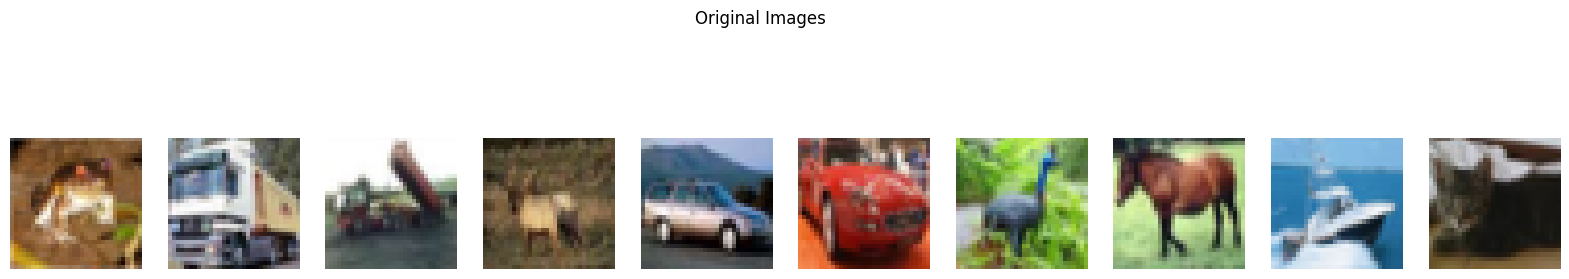

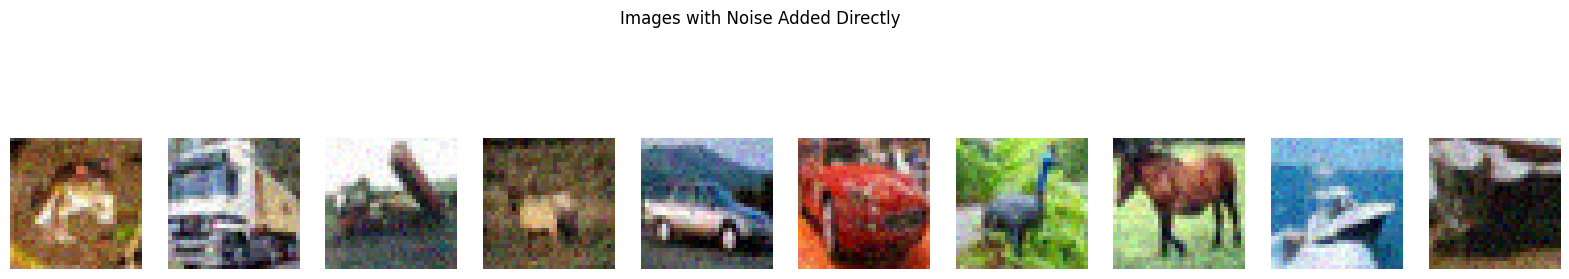

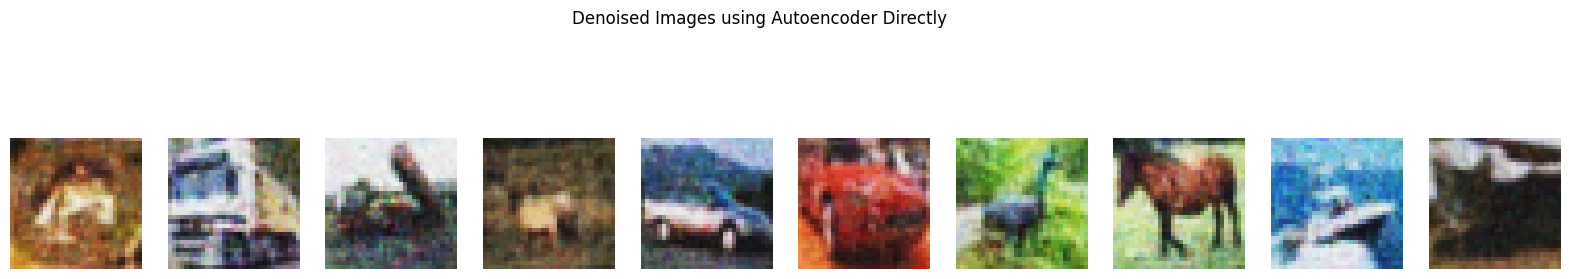

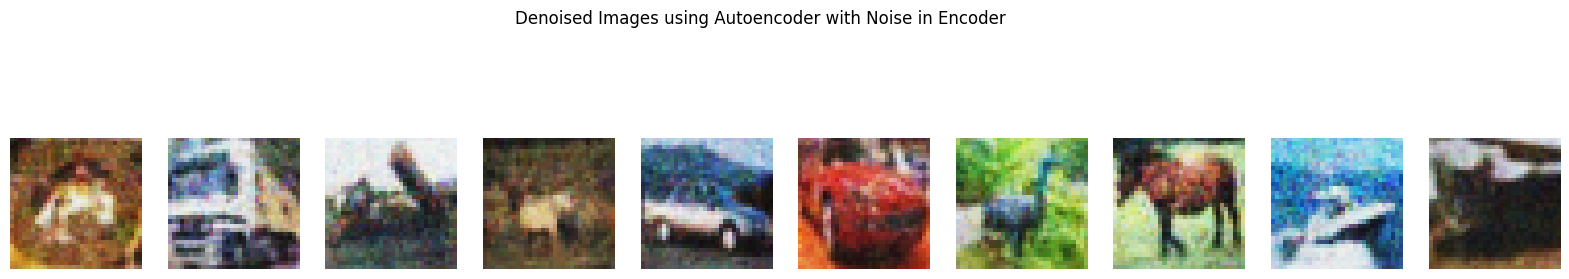

In [11]:

def main():
    images = load_cifar10()
    noisy_images_direct = add_gaussian_noise(images)

    input_img, flat_img = build_autoencoder(images[0].shape)
    flat_img_noisy = add_noise_to_encoder(flat_img)
    decoded_direct = build_decoder(flat_img_noisy, images[0].shape)

    autoencoder_direct = Model(input_img, decoded_direct)
    autoencoder_with_noise = Model(input_img, build_decoder(flat_img, images[0].shape))

    compile_model(autoencoder_direct)
    compile_model(autoencoder_with_noise)

    train_model(autoencoder_direct, noisy_images_direct, images)
    train_model(autoencoder_with_noise, noisy_images_direct, images)

    decoded_images_direct = generate_denoised_images(autoencoder_direct, noisy_images_direct)
    decoded_images_with_noise = generate_denoised_images(autoencoder_with_noise, noisy_images_direct)

    plot_images(images, 'Original Images')
    plot_images(noisy_images_direct, 'Images with Noise Added Directly')
    plot_images(decoded_images_direct, 'Denoised Images using Autoencoder Directly')
    plot_images(decoded_images_with_noise, 'Denoised Images using Autoencoder with Noise in Encoder')

if __name__ == "__main__":
    main()